# Assignment 2

In [ ]:
# Author -> Sanath Shivaswamy
# ID -> W1166731

In [1]:
#Importing packages
import pandas as pd
import re
import matplotlib.pyplot as plt
from os import path
from nltk.corpus import stopwords

## Sentimental Analysis for TRUMP

In [ ]:
# I added extra functionality to tweetering.py to clean the tweets (Ex: Remove Authors, Special Characters and so on)
# The cleaned tweets are saved in the trump_tweets.txt file
# 10,000 tweets each for trump and clinton

In [19]:
file = open("trump_tweets.txt","r")
tweets = file.read()

In [20]:
# Cleaned trump tweets
tweets = tweets.strip("[]") 
tweet_list = tweets.split(",")
print(tweet_list[:10]) 

["u'so it really sticks in the craw to see people bring it up to defend Trump when there was fuck all effort to push left on it'", " u'Hillary Clinton to Ellen DeGeneres Trump stalking me was really weird I take absolutely no satisfaction'", " u'I so agree I can t watch this orange clown anymore Who does he think he is DICKtator Trump'", " u'Woman claims Trump grabbed and forcibly kissed her in front of her family at Mother s Day brunch Raw Story'", " u'Freedom loving Americans repudiate anybody who says they want to make lawful voters a little bit nervous at polls'", " u'BOOOOM HillaryBecause Hillary Clinton Camp amp GloriaAllred amp DNC Conspired Hoax Grope on Donald Trump read wh'", " u'Enough is Enough Team Trump Severed Ties With Kasich s Ohio GOPe Chairman'", " u'Alec Baldwin nails Trump again but it s Ken Bone who steals the show on SNL'", " u'Trump wants supporters to be election monitors I asked one what he ll watch for It s called racial profiling'", " u'Interesting thread I 

In [55]:
# Removing stop words
cached_stop_words = stopwords.words("english")
# Removing trivial words from consideration
cached_stop_words.extend(["like","trump","donald","hillary","clinton","says","support","vote","media","said","realdonaldtrump","debate","must","know","peter","would","make"])
word_list = []
for tweet in tweet_list:
    for word in tweet.split():
        word = re.sub('^u\'','',word)
        word = re.sub('\'','',word)
        word = word.lower()
        if len(word) > 3:
            if str(word) not in cached_stop_words:
                word_list.append(word)

In [56]:
print(word_list[:50])

['really', 'sticks', 'craw', 'people', 'bring', 'defend', 'fuck', 'effort', 'push', 'left', 'ellen', 'degeneres', 'stalking', 'really', 'weird', 'take', 'absolutely', 'satisfaction', 'agree', 'watch', 'orange', 'clown', 'anymore', 'think', 'dicktator', 'woman', 'claims', 'grabbed', 'forcibly', 'kissed', 'front', 'family', 'mother', 'brunch', 'story', 'freedom', 'loving', 'americans', 'repudiate', 'anybody', 'want', 'lawful', 'voters', 'little', 'nervous', 'polls', 'boooom', 'hillarybecause', 'camp', 'gloriaallred']


In [57]:
# Calculating frequency of each word
word_freq = {}
for word in word_list:
    if word in word_freq.keys():
        word_freq[word] = word_freq[word] + 1
    else:
        word_freq[word] = 1

In [58]:
# Print top ten words for TRUMP
sorted_word_freq = list(sorted(word_freq.iteritems(), key=lambda (k,v): (v,k), reverse=True))
top_ten = []
print("Top 10 words for TRUMP:")
for i in range(10):
    top_ten.append(sorted_word_freq[i])
    print(sorted_word_freq[i])

Top 10 words for TRUMP:
('women', 515)
('election', 480)
('people', 414)
('president', 386)
('supporters', 346)
('campaign', 346)
('thiel', 288)
('million', 273)
('rigged', 243)
('black', 193)


Populating the interactive namespace from numpy and matplotlib


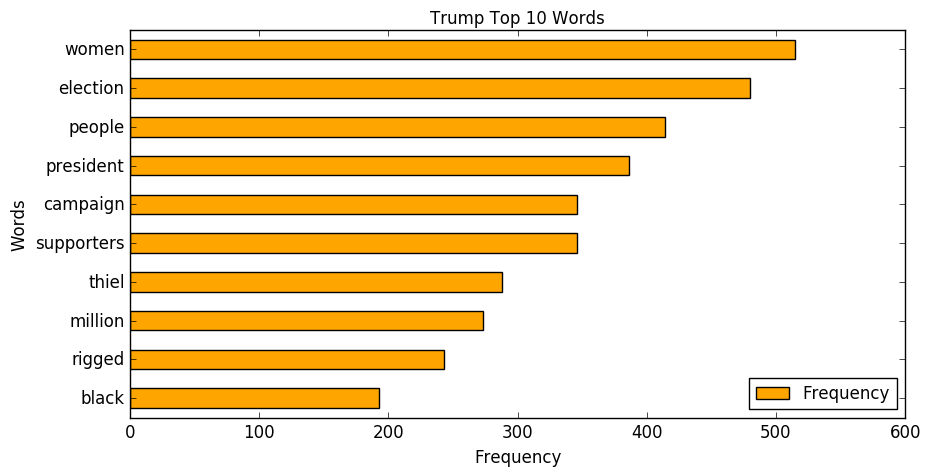

In [59]:
%pylab inline
df = pd.DataFrame(top_ten)
df[1] = pd.to_numeric(df[1])
df.columns = ["Words","Frequency"]
df.index = df.Words
df = df.sort_values(by='Frequency', ascending=1)
top_10 = df[['Words','Frequency']].plot(kind='barh', title ="Trump Top 10 Words",figsize=(10,5),legend=True, fontsize=12,color='orange')
top_10.set_xlabel("Frequency",fontsize=12)
top_10.set_ylabel("Words",fontsize=12)
plt.show()

In [60]:
# Adding sentiment values to top 10 words
top_ten_dict = {}
sentiment = [-1,1,1,1,1,1,1,1,-1,-1] # manually setting sentiment value
counter = 0
for key, value in top_ten:
    top_ten_dict[key] = value * sentiment[counter] #taking the word freq into account
    counter = counter + 1

In [61]:
print(top_ten_dict)

{'million': 273, 'supporters': 346, 'campaign': 346, 'people': 414, 'thiel': 288, 'black': -193, 'election': 480, 'rigged': -243, 'president': 386, 'women': -515}


In [62]:
# Calculating Average Sentiment Value
sum = 0
for score in top_ten_dict.values():
    sum = sum + score
avg = sum/10

In [63]:
print("Trump: Average Sentiment Value = %s"%avg)

Trump: Average Sentiment Value = 158


## Sentimental Analysis for CLINTON

In [ ]:
# I added extra functionality to tweetering.py to clean the tweets (Ex: Remove Authors, Special Characters and so on)
# The cleaned tweets are saved in the clinton_tweets.txt file
# 10,000 tweets each for trump and clinton

In [2]:
file = open("clinton_tweets.txt","r")
tweets = file.read()

In [3]:
# Cleaned clinton tweets
tweets = tweets.strip("[]") 
tweet_list = tweets.split(",")
print(tweet_list[:10]) 

["u'Leaked emails reveal Hillary Clinton s life of deceit'", " u'Hillary Clinton definately knew what C meant she used in her own classified emails she LIED to FBI amp America MAGA h'", " u'BUSTED CLINTON CAUGHT LYING OVER TPP SUPPORT Busted HillaryClinton Liar TPP Trade DonaldTrump MAGA Infowars'", " u'Hedge funds have given Hillary Clinton MILLION this election cycle compared to k for Trump'", " u'New trending GIF tagged snl saturday night live hillary clinton kate mckinnon snl season'", " u'How a top Clinton confidante trashed Chelsea after she flagged serious concerns about Clinton Foundation conflicts ht'", " u'So Drudge is leaking a poll that supposedly has Clinton up and this is good news for Trump Talk about low expectati'", " u'JCT_Article Clinton Foundation Donors Got Weapons Deals From Hillary Clinton s State Department'", " u'DRUDGE_REPORT Why do women s groups treat Bill Clinton and Donald Trump differently'", " u'Another feather'"]


In [10]:
# Removing stop words
cached_stop_words = stopwords.words("english")
# Removing trivial words from consideration
cached_stop_words.extend(["like","trump","donald","hillary","clinton","says","going","sachs","media","vote"])
word_list = []
for tweet in tweet_list:
    for word in tweet.split():
        word = re.sub('^u\'','',word)
        word = re.sub('\'','',word)
        word = word.lower()
        if len(word) > 3:
            if word not in cached_stop_words:
                word_list.append(word)

In [11]:
print(word_list[:50])

['leaked', 'emails', 'reveal', 'life', 'deceit', 'definately', 'knew', 'meant', 'used', 'classified', 'emails', 'lied', 'america', 'maga', 'busted', 'caught', 'lying', 'support', 'busted', 'hillaryclinton', 'liar', 'trade', 'donaldtrump', 'maga', 'infowars', 'hedge', 'funds', 'given', 'million', 'election', 'cycle', 'compared', 'trending', 'tagged', 'saturday', 'night', 'live', 'kate', 'mckinnon', 'season', 'confidante', 'trashed', 'chelsea', 'flagged', 'serious', 'concerns', 'foundation', 'conflicts', 'drudge', 'leaking']


In [12]:
# Calculating frequency of each word
word_freq = {}
for word in word_list:
    if word in word_freq.keys():
        word_freq[word] = word_freq[word] + 1
    else:
        word_freq[word] = 1

In [13]:
# Print top ten words for CLINTON
sorted_word_freq = list(sorted(word_freq.iteritems(), key=lambda (k,v): (v,k), reverse=True))
top_ten = []
print("Top 10 words for CLINTON:")
for i in range(10):
    top_ten.append(sorted_word_freq[i])
    print(sorted_word_freq[i])

Top 10 words for CLINTON:
('wikileaks', 1228)
('emails', 948)
('campaign', 828)
('bill', 566)
('goldman', 496)
('american', 393)
('podestaemails', 389)
('transcripts', 366)
('people', 328)
('foundation', 325)


Populating the interactive namespace from numpy and matplotlib


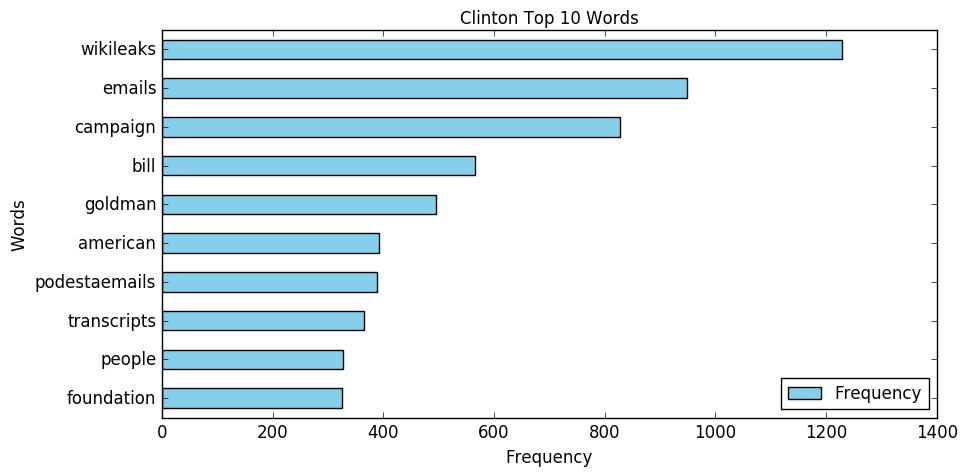

In [14]:
%pylab inline
df = pd.DataFrame(top_ten)
df[1] = pd.to_numeric(df[1])
df.columns = ["Words","Frequency"]
df.index = df.Words
df = df.sort_values(by='Frequency', ascending=1)
top_10 = df[['Words','Frequency']].plot(kind='barh', title ="Clinton Top 10 Words",figsize=(10,5),legend=True, fontsize=12,color='skyblue')
top_10.set_xlabel("Frequency",fontsize=12)
top_10.set_ylabel("Words",fontsize=12)
plt.show()

In [15]:
# Adding sentiment values to top 10 words
top_ten_dict = {}
sentiment = [-1,-1,1,1,-1,-1,1,1,1,1] # manually setting sentiment value
counter = 0
for key, value in top_ten:
    top_ten_dict[key] = value * sentiment[counter] #taking the word freq into account
    counter = counter + 1

In [16]:
print(top_ten_dict)

{'foundation': 325, 'campaign': 828, 'people': 328, 'goldman': -496, 'bill': 566, 'podestaemails': 389, 'american': -393, 'wikileaks': -1228, 'transcripts': 366, 'emails': -948}


In [17]:
# Calculating Average Sentiment Value
sum = 0
for score in top_ten_dict.values():
    sum = sum + score
avg = sum/10

In [18]:
print("Clinton: Average Sentiment Value = %s"%avg)

Clinton: Average Sentiment Value = -27
